<a href="https://colab.research.google.com/github/ersdanforth/UPenn_Social-Policy-and-Data-Analytics/blob/main/SchoolSatisfaction_Demographics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats as stats

In [ ]:
demo = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/MSSP-607/Assignments/Final/demographics.xlsx')
survey = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/MSSP-607/Assignments/Final/survey.xlsx')
housing = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/MSSP-607/Assignments/Final/temphousing.xlsx')
questions = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/MSSP-607/Assignments/Final/QuestionList.xlsx')

In [ ]:
survey.head()

,DBN,School Name,Response Rate,Q1,Q2,Q3,Q4,Q5,Q6,Q7,...,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Q55,Q56
0,01M034,P.S. 034 Franklin D. Roosevelt,0.75,0.631579,0.818182,0.902439,0.888889,0.901235,0.821918,0.906977,...,0.935484,0.896552,0.903226,0.530612,0.282828,0.252525,0.414141,0.329897,0.083333,0.126316
1,01M140,P.S. 140 Nathan Straus,0.51,0.862500,0.968750,0.962963,0.883117,0.975000,0.837500,0.976744,...,0.963636,0.981132,1.000000,0.311111,0.133333,0.133333,0.280899,0.311111,0.067416,0.034091
2,01M184,P.S. 184m Shuang Wen,0.87,0.885375,0.871429,0.908333,0.783186,0.879518,0.826271,0.934109,...,0.904762,0.909091,0.902857,0.200743,0.085821,0.130112,0.152416,0.178439,0.044776,0.037453
3,01M188,P.S. 188 The Island School,0.70,0.990741,0.990826,0.990826,0.990826,0.990741,0.990826,0.990826,...,0.987500,0.987179,0.987013,0.018349,0.018349,0.018349,0.018349,0.018349,0.018349,0.019048
4,01M292,Orchard Collegiate Academy,0.35,0.988636,1.000000,0.945055,0.943182,0.978947,0.943182,0.989474,...,0.875000,0.950820,0.952381,0.158416,0.099010,0.099010,0.128713,0.099010,0.148515,0.060000


In [ ]:
demo = demo[demo['Year'] == '2021-22']
demo.shape #1881 rows
survey.shape #1077 rows
housing.shape #1689 rows

(1689, 9)

In [ ]:
df1 = demo.merge(survey, how='inner', on='DBN')
df = df1.merge(housing, how='inner', on='DBN')
df.shape #95 columns, 915 rows
df.tail()

,DBN,School Name_x,Year,Total Enrollment,# Female,% Female,# Male,% Male,# Asian,% Asian,...,Q55,Q56,School Name,# Total Students,# Students in Temporary Housing,% Students in Temporary Housing,# Students Residing in Shelter,# Residing in DHS Shelter,# Residing in Non-DHS Shelter,# Doubled Up
910,75X469,P469X - The Bronx School for Continuous Learners,2021-22,513,105,0.204678,408,0.795322,33,0.064327,...,0.000000,0.000000,P469X - The Bronx School for Continuous Learners,547,81,0.14808,47,31,16,28
911,75X721,P.S. X721 - Stephen McSweeney School,2021-22,547,190,0.347349,357,0.652651,18,0.032907,...,0.167647,0.198777,P.S. X721 - Stephen McSweeney School,585,63,0.107692,31,13,18,24
912,75X723,P.S. 723,2021-22,428,118,0.275701,310,0.724299,6,0.014019,...,0.210526,0.277778,P.S. 723,486,93,0.191358,45,25,20,24
913,75X754,J. M. Rapport School Career Development,2021-22,477,154,0.322851,323,0.677149,7,0.014675,...,0.206897,0.250000,J. M. Rapport School Career Development,505,96,0.190099,62,32,30,15
914,75X811,P.S. X811,2021-22,607,208,0.342669,399,0.657331,29,0.047776,...,0.053571,0.053571,P.S. X811,649,59,0.090909,31,13,18,25


In [ ]:
df.dtypes

DBN                                object
School Name_x                      object
Year                               object
Total Enrollment                    int64
# Female                            int64
                                    ...  
% Students in Temporary Housing    object
# Students Residing in Shelter     object
# Residing in DHS Shelter          object
# Residing in Non-DHS Shelter      object
# Doubled Up                       object
Length: 95, dtype: object

In [ ]:
df['District'] = df['DBN'].str[:2]
df['District'].unique()

df['Borough'] = df['DBN'].str[2]
df['Borough'] = df['Borough'].replace(['M', 'X', 'K', 'Q', 'R'], ['Manhattan', 'Bronx', 'Brooklyn', 'Queens', 'Staten Island'])
df['Borough'].unique()

len(df[df['Borough']=='Brooklyn'])

267

In [ ]:
df['% Poverty'].unique()
df['% Poverty'].replace({'Above 95%': .95}, inplace=True)
df['% Poverty'].describe()

stats.normaltest(df['% Poverty'])

df.groupby('Borough')['% Poverty'].mean().reset_index()

,Borough,% Poverty
0,Bronx,0.878974
1,Brooklyn,0.804650
2,Manhattan,0.725835
3,Queens,0.718694
4,Staten Island,0.656444


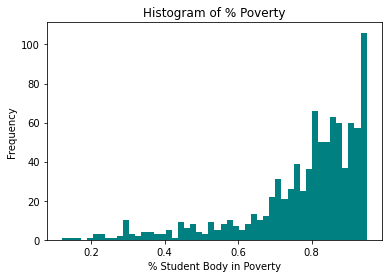

In [ ]:
df['% Poverty'].plot.hist(color=['teal'], bins=50)
plt.xlabel("% Student Body in Poverty")
plt.ylabel("Frequency")
plt.title("Histogram of % Poverty")
plt.savefig('/content/drive/MyDrive/Colab Notebooks/MSSP-607/Assignments/Final/Poverty_hist.pdf')

In [ ]:
df['% Students in Temporary Housing'].unique()
df['% Students in Temporary Housing'].replace({'s': 0.0}, inplace=True)
df['% Students in Temporary Housing'] = df['% Students in Temporary Housing'].astype(float)
df['% Students in Temporary Housing'].describe()

stats.normaltest(df['% Students in Temporary Housing'])

count    915.000000
mean       0.109026
std        0.076701
min        0.000000
25%        0.052780
50%        0.096360
75%        0.146796
max        0.501319
Name: % Students in Temporary Housing, dtype: float64

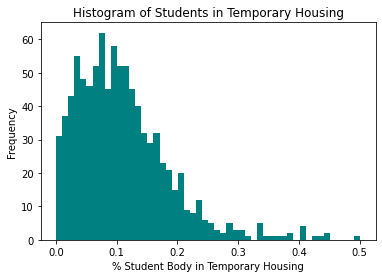

In [ ]:
df['% Students in Temporary Housing'].plot.hist(color=['teal'], bins=50)
plt.xlabel("% Student Body in Temporary Housing")
plt.ylabel("Frequency")
plt.title("Histogram of Students in Temporary Housing")
plt.savefig('/content/drive/MyDrive/Colab Notebooks/MSSP-607/Assignments/Final/TempHousing_hist.pdf')

In [ ]:
hous = df.groupby('District')['% Students in Temporary Housing'].mean()
hous.sort_values()

,Borough,% Students in Temporary Housing
0,Bronx,0.153668
1,Brooklyn,0.104855
2,Manhattan,0.115008
3,Queens,0.067971
4,Staten Island,0.035201


In [ ]:
df['% Asian'].describe()
df['% Black'].describe()
df['% Hispanic'].describe()
df['% White'].describe()

df.groupby('Borough')['% Asian', '% Black', '% Hispanic', '% White', '% Poverty', '% Students in Temporary Housing'].mean().reset_index()

<ipython-input-11-2839c1561c3c>:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Borough')['% Asian', '% Black', '% Hispanic', '% White', '% Poverty', '% Students in Temporary Housing'].mean().reset_index()


,Borough,% Asian,% Black,% Hispanic,% White,% Poverty,% Students in Temporary Housing
0,Bronx,0.038964,0.261982,0.645023,0.037404,0.878974,0.153668
1,Brooklyn,0.101588,0.431824,0.332302,0.110347,0.804650,0.104855
2,Manhattan,0.100751,0.224184,0.506887,0.131242,0.725835,0.115008
3,Queens,0.225330,0.238626,0.375366,0.121525,0.718694,0.067971
4,Staten Island,0.133817,0.165728,0.312836,0.359187,0.656444,0.035201


In [ ]:
#define students of color
df['SoC'] = 1 - df['% White']
df.head()

,DBN,School Name_x,Year,Total Enrollment,# Female,% Female,# Male,% Male,# Asian,% Asian,...,# Total Students,# Students in Temporary Housing,% Students in Temporary Housing,# Students Residing in Shelter,# Residing in DHS Shelter,# Residing in Non-DHS Shelter,# Doubled Up,District,Borough,SoC
0,01M034,P.S. 034 Franklin D. Roosevelt,2021-22,258,116,0.449612,142,0.550388,8,0.031008,...,284,61,0.214789,37,22,15,24,01,Manhattan,0.976744
1,01M140,P.S. 140 Nathan Straus,2021-22,340,157,0.461765,183,0.538235,8,0.023529,...,362,84,0.232044,32,19,13,47,01,Manhattan,0.958824
2,01M184,P.S. 184m Shuang Wen,2021-22,717,347,0.483961,370,0.516039,501,0.698745,...,722,81,0.112188,s,s,s,79,01,Manhattan,0.917713
3,01M188,P.S. 188 The Island School,2021-22,390,161,0.412821,229,0.587179,16,0.041026,...,398,160,0.402010,93,69,24,57,01,Manhattan,0.979487
4,01M292,Orchard Collegiate Academy,2021-22,290,127,0.437931,163,0.562069,44,0.151724,...,296,35,0.118243,15,8,7,19,01,Manhattan,0.979310


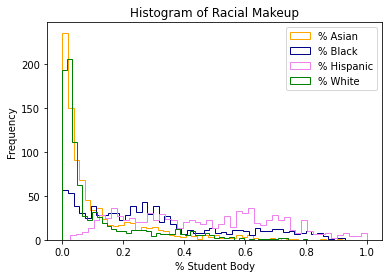

In [ ]:
import seaborn as sns

Asian = df['% Asian'].plot.hist(color=['orange'], bins=50, histtype=u'step')
Black = df['% Black'].plot.hist(color=['darkblue'], bins=50, histtype=u'step')
Hispanic = df['% Hispanic'].plot.hist(color=['violet'], bins=50, histtype=u'step')
White = df['% White'].plot.hist(color=['green'], bins=50, histtype=u'step')

plt.legend()
plt.xlabel("% Student Body")
plt.ylabel("Frequency")
plt.title("Histogram of Racial Makeup")
plt.savefig('/content/drive/MyDrive/Colab Notebooks/MSSP-607/Assignments/Final/Race_hist.pdf')

In [ ]:
#question exploration
survey.std().sort_values(ascending=False)

<ipython-input-45-1ffbb154f3b2>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  survey.std().sort_values(ascending=False)


Response Rate    0.264289
Q44              0.166732
Q15              0.134158
Q14              0.129411
Q27              0.125254
Q32              0.119486
Q16              0.115149
Q43              0.114670
Q50              0.113601
Q22              0.113083
Q24              0.108001
Q42              0.106054
Q31              0.104347
Q17              0.103177
Q41              0.100849
Q53              0.097281
Q6               0.096038
Q25              0.093049
Q11              0.092425
Q23              0.090116
Q26              0.088954
Q1               0.088023
Q54              0.086460
Q13              0.083956
Q20              0.078058
Q35              0.077135
Q46              0.075604
Q55              0.073467
Q33              0.072169
Q9               0.071542
Q19              0.071319
Q39              0.070678
Q40              0.070153
Q30              0.069376
Q45              0.068517
Q56              0.066964
Q52              0.066701
Q51              0.066183
Q28         

In [ ]:
df['Response Rate'].describe()

count    915.000000
mean       0.505519
std        0.254720
min        0.000000
25%        0.320000
50%        0.530000
75%        0.700000
max        1.000000
Name: Response Rate, dtype: float64

In [ ]:
#Question Exploration
#  'q6. At this school, we have conversations about race and racism with adults.Strongly Agree/Agree',
#  'q14. During this school year, I have felt bored when learning.Strongly Agree/Agree',
#  'q15. During this school year, I have felt stressed out when learning.Strongly Agree/Agree',
#  'q16. During this school year, I have felt worried when learning.Strongly Agree/Agree',
#  'q17. I learn a lot from feedback on my work.All/Most',
#  'q24. My teachers notice if I have trouble learning something.All/Most',
#  'q25. My teachers give me specific suggestions about how I can improve my work in class.All/Most',
#  'q27. My teachers…support me when I am upset.All/Most',
#  'q32. There is time at school to talk about feelings and emotions.Strongly Agree/Agree',
#  'q43. In how many of your classes do your teachers ask difficult questions in class?All/Most',
#  'q44. In how many of your classes do you work in small groups?All/Most',
#  'q50. At this school students harass, bully, or intimidate other students.Most of the time/Some of the time',
list(questions)

In [ ]:
df['Q6'].describe()
df['Q15'].describe()
df['Q17'].describe()
df['Q24'].describe()
df['Q44'].describe()
df['Q50'].describe()

count    4456.000000
mean        0.851058
std         0.098567
min         0.381188
25%         0.800000
50%         0.866667
75%         0.920000
max         1.000000
Name: Q6, dtype: float64

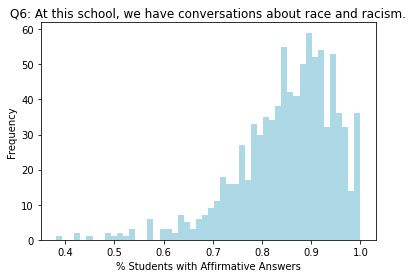

In [ ]:
df['Q6'].plot.hist(color=['lightblue'], bins=50)
plt.xlabel("% Students with Affirmative Answers")
plt.ylabel("Frequency")
plt.title("Q6: At this school, we have conversations about race and racism.")
plt.savefig('/content/drive/MyDrive/Colab Notebooks/MSSP-607/Assignments/Final/Q6.pdf')

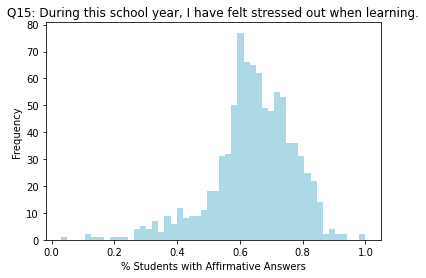

In [ ]:
df['Q15'].plot.hist(color=['lightblue'], bins=50)
plt.xlabel("% Students with Affirmative Answers")
plt.ylabel("Frequency")
plt.title("Q15: During this school year, I have felt stressed out when learning.")
plt.savefig('/content/drive/MyDrive/Colab Notebooks/MSSP-607/Assignments/Final/Q15.pdf')

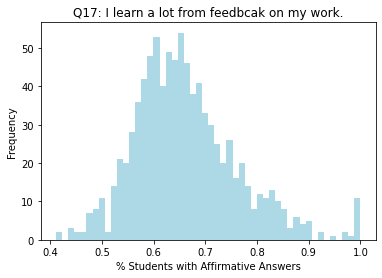

In [ ]:
df['Q17'].plot.hist(color=['lightblue'], bins=50)
plt.xlabel("% Students with Affirmative Answers")
plt.ylabel("Frequency")
plt.title("Q17: I learn a lot from feedbcak on my work.")
plt.savefig('/content/drive/MyDrive/Colab Notebooks/MSSP-607/Assignments/Final/Q17.pdf')

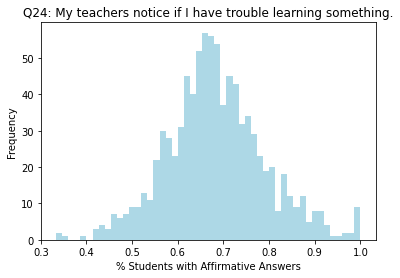

In [ ]:
df['Q24'].plot.hist(color=['lightblue'], bins=50)
plt.xlabel("% Students with Affirmative Answers")
plt.ylabel("Frequency")
plt.title("Q24: My teachers notice if I have trouble learning something.")
plt.savefig('/content/drive/MyDrive/Colab Notebooks/MSSP-607/Assignments/Final/Q24.pdf')

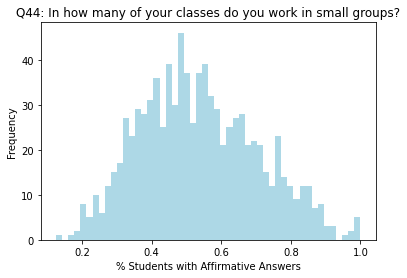

In [ ]:
df['Q44'].plot.hist(color=['lightblue'], bins=50)
plt.xlabel("% Students with Affirmative Answers")
plt.ylabel("Frequency")
plt.title("Q44: In how many of your classes do you work in small groups?")
plt.savefig('/content/drive/MyDrive/Colab Notebooks/MSSP-607/Assignments/Final/Q44.pdf')

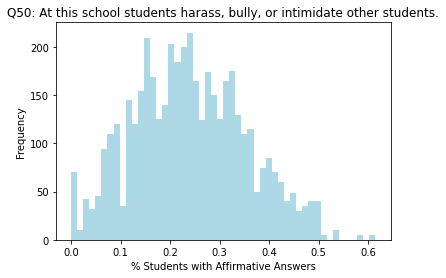

In [ ]:
df['Q50'].plot.hist(color=['lightblue'], bins=50)
plt.xlabel("% Students with Affirmative Answers")
plt.ylabel("Frequency")
plt.title("Q50: At this school students harass, bully, or intimidate other students.")
plt.savefig('/content/drive/MyDrive/Colab Notebooks/MSSP-607/Assignments/Final/Q50.pdf')

In [ ]:
q_dem = df.corr().loc[['% Poverty','% Students in Temporary Housing','% Asian', '% Black','% Hispanic','% White'], 
              ['Q6','Q15','Q17','Q24','Q44','Q50']]
q_dem

,Q6,Q15,Q17,Q24,Q44,Q50
% Poverty,0.098483,-0.216503,0.163287,0.286079,-0.198462,0.195369
% Students in Temporary Housing,0.167002,-0.228527,0.193487,0.306421,-0.032543,0.150145
% Asian,-0.190157,0.102463,-0.131510,-0.248956,0.096124,-0.132590
% Black,0.118976,-0.082158,0.001905,0.003672,-0.085504,0.275097
% Hispanic,0.162685,-0.031343,0.147646,0.271038,-0.098241,-0.079799
% White,-0.280756,0.045806,-0.103567,-0.165785,0.161471,-0.153123


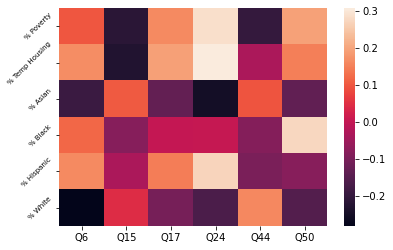

In [ ]:
ax1 = sns.heatmap(q_dem)
labels = ['% Poverty', '% Temp Housing', '% Asian','% Black','% Hispanic','% White']
ax1.set_yticklabels(labels, minor=False, rotation=45, size=7) 
plt.savefig('/content/drive/MyDrive/Colab Notebooks/MSSP-607/Assignments/Final/Heatmap.pdf')

In [ ]:
df.groupby('Borough')['Response Rate'].mean().reset_index()

,Borough,Response Rate
0,Bronx,0.506667
1,Brooklyn,0.489064
2,Manhattan,0.485171
3,Queens,0.538021
4,Staten Island,0.576897


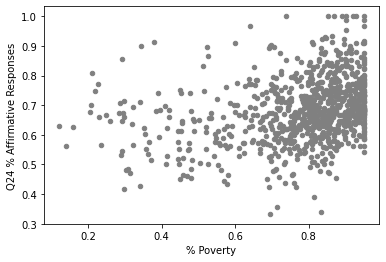

In [ ]:
ax1 = df.plot.scatter(x='% Poverty', y='Q24', c='gray')
plt.xlabel('% Poverty')
plt.ylabel("Q24 % Affirmative Responses")
plt.savefig('/content/drive/MyDrive/Colab Notebooks/MSSP-607/Assignments/Final/Q24vPoverty.pdf')

In [ ]:
import statsmodels.api as sm
df = df.dropna(axis= 0, how='any')

y = df['Q24']
X = df['% Poverty']
X = sm.add_constant(X)
model1 = sm.OLS(y, X).fit()
model1.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Q24   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     80.58
Date:                Fri, 09 Dec 2022   Prob (F-statistic):           1.62e-18
Time:                        15:16:03   Log-Likelihood:                 763.97
No. Observations:                 894   AIC:                            -1524.
Df Residuals:                     892   BIC:                            -1514.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5335      0.017     31.406      0.000       0.500       0.567
% Poverty      0.1909      0.021      8.977      0.000       0.149       0.233
==============================================================================
Omnibus:                       23.246   Durbin-Watson:                   1.609
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.014
Skew:                           0.327   Prob(JB):                     1.36e-06
Kurtosis:                       3.547   Cond. No.                         10.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
y = df['Q24']
X = df[['% Poverty','% Students in Temporary Housing']]
X = sm.add_constant(X)
model2 = sm.OLS(y, X).fit()
model2.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Q24   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     56.52
Date:                Fri, 09 Dec 2022   Prob (F-statistic):           7.79e-24
Time:                        15:00:24   Log-Likelihood:                 778.69
No. Observations:                 894   AIC:                            -1551.
Df Residuals:                     891   BIC:                            -1537.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.5666      0.018     31.858      0.000       0.532       0.602
% Poverty                           0.1069      0.026      4.117      0.000       0.056       0.158
% Students in Temporary Housing     0.2987      0.055      5.463      0.000       0.191       0.406
==============================================================================
Omnibus:                       27.492   Durbin-Watson:                   1.572
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.318
Skew:                           0.363   Prob(JB):                     9.60e-08
Kurtosis:                       3.584   Cond. No.                         21.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
y = df['Q24']
X = df[['% Poverty','% Students in Temporary Housing','SoC']]
X = sm.add_constant(X)
model3 = sm.OLS(y, X).fit()
model3.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Q24   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     42.33
Date:                Fri, 09 Dec 2022   Prob (F-statistic):           1.41e-25
Time:                        15:19:57   Log-Likelihood:                 784.93
No. Observations:                 894   AIC:                            -1562.
Df Residuals:                     890   BIC:                            -1543.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.6154      0.022     27.449      0.000       0.571       0.659
% Poverty                           0.1905      0.035      5.443      0.000       0.122       0.259
% Students in Temporary Housing     0.3213      0.055      5.873      0.000       0.214       0.429
SoC                                -0.1308      0.037     -3.536      0.000      -0.203      -0.058
==============================================================================
Omnibus:                       27.375   Durbin-Watson:                   1.591
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.145
Skew:                           0.362   Prob(JB):                     1.05e-07
Kurtosis:                       3.581   Cond. No.                         26.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
bor = df.groupby('Borough')['Q6','Q15','Q17','Q24','Q44','Q50'].mean().transpose()
bor

<ipython-input-58-f344b7bd9ed9>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  bor = df.groupby('Borough')['Q6','Q15','Q17','Q24','Q44','Q50'].mean().transpose()


Borough,Bronx,Brooklyn,Manhattan,Queens,Staten Island
Q6,0.864013,0.853742,0.899171,0.806141,0.703043
Q15,0.645206,0.628936,0.653424,0.650796,0.634712
Q17,0.670066,0.651325,0.677650,0.654825,0.634747
Q24,0.697290,0.679041,0.699575,0.663714,0.629741
Q44,0.515695,0.519484,0.588027,0.541492,0.454369
Q50,0.259281,0.250112,0.189119,0.252504,0.262238


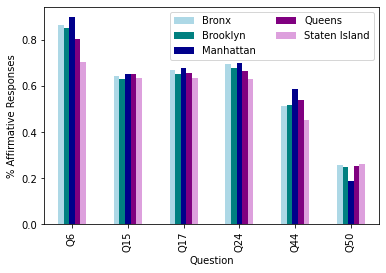

In [ ]:
bor.plot.bar(color=['lightblue', 'teal', 'darkblue','purple','plum'])
plt.xlabel("Question")
plt.ylabel("% Affirmative Responses")
plt.legend(loc="best", ncol=2)
plt.savefig('/content/drive/MyDrive/Colab Notebooks/MSSP-607/Assignments/Final/QvBorough.pdf')